<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       

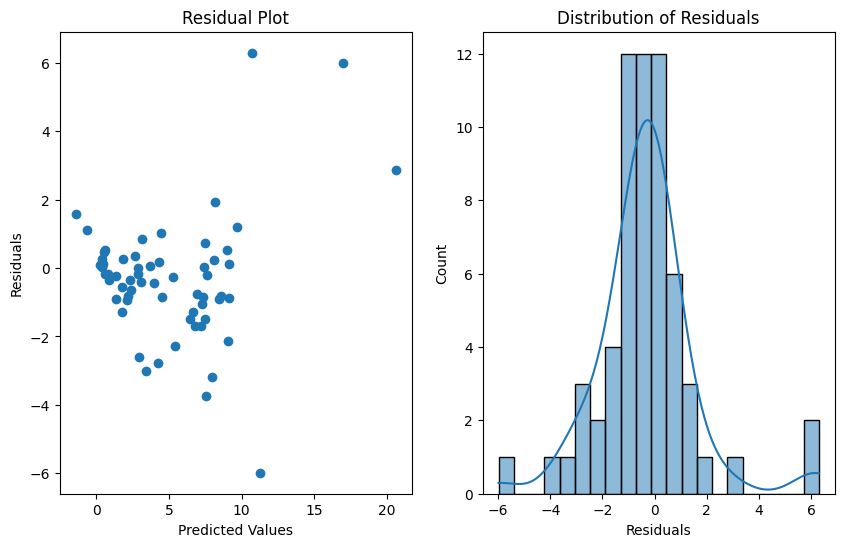

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Read the cars dataset given
cars_df = pd.read_csv('car data.csv')  # Adjust the filename as per your dataset

# Step 2: performing EDA
# Data Quality Check
print(cars_df.info())
print(cars_df.describe())

# Treat Missing Values if any
cars_df.dropna(inplace=True)

# Step 3: Transform Categorical Data
cars_df = pd.get_dummies(cars_df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])

# Step 4: Apply Multiple Linear Regression Model
X = cars_df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = cars_df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Print the Model Results
print(f'Intercept: {model.intercept_}')
print('Coefficients:')
for feature, coefficient in zip(X.columns, model.coef_):
    print(f'{feature}: {coefficient}')

# Step 6: Get Feature Importance
# Step 7: Visualize the Diagnostic Plots
# Residual plot
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.show()
